#**Data Spaces**
###**Matteo Stoisa**

###*IMPORT LIBRERIE:*

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns; 
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

drive.mount('/content/gdrive', force_remount=True)
dataset_path = "/content/gdrive/My Drive/Colab Notebooks/the-spotify-hit-predictor-dataset/dataset-of-10s.csv"

Mounted at /content/gdrive


###*SETUP DATASET AND SPLITS:*


In [2]:
whole_dataset = pd.read_csv(dataset_path, delimiter=",") 

#ADD 'FEATUR' FEATURE
artists = whole_dataset.loc[:, 'artist']
withFeaturing = []
for artist in artists:
  if "Featuring" in artist:
    withFeaturing.append(1)
  else:
    withFeaturing.append(0)
whole_dataset['featuring'] = withFeaturing

#NORMALIZATION
scaler = preprocessing.MinMaxScaler()
features_to_scale = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit', 'sections']
whole_dataset[features_to_scale] = scaler.fit_transform(whole_dataset[features_to_scale])

#DEFINE FEATURE TYPES
whole_features = list(whole_dataset.columns.values)
secondary_features = ['track', 'artist', 'uri']
discrete_features = ['key', 'mode', 'time_signature', 'section', 'featuring']
primary_features = []
continuous_features = []
for feature in whole_features:
  if feature not in secondary_features:
    primary_features.append(feature)
    if feature not in discrete_features:
      continuous_features.append(feature)
primary_features.remove('target')
continuous_features.remove('target')

#SPLIT DATASET
dataset = whole_dataset.drop(columns = secondary_features)
dataset_labels = dataset.loc[:, 'target']
dataset = dataset.drop(columns='target')
dataset_0 = whole_dataset.loc[whole_dataset['target'] == 0]
dataset_1 = whole_dataset.loc[whole_dataset['target'] == 1]
dataset_0 = dataset_0.drop(columns=secondary_features)
dataset_0 = dataset_0.drop(columns='target')
dataset_1 = dataset_1.drop(columns=secondary_features)
dataset_1 = dataset_1.drop(columns='target')

#TRAIN-TEST SPLIT
x_train, x_test, y_train, y_test = train_test_split(dataset, dataset_labels, test_size=0.2, stratify=dataset_labels, random_state=15)

###*DATASET:* 


In [ ]:
dataset

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,featuring
0,0.738790,0.626533,0.090909,0.899432,0,0.070809,0.020080,0.000000,0.068476,0.723361,0.400098,0.093080,0.8,0.193225,0.093023,0
1,0.418807,0.247058,0.454545,0.687954,0,0.012962,0.874498,0.818090,0.080700,0.256148,0.676658,0.086266,0.6,0.155665,0.081395,0
2,0.530910,0.415269,0.818182,0.862211,0,0.031601,0.161647,0.000000,0.094582,0.280738,0.773251,0.103036,0.8,0.210605,0.081395,0
3,0.478668,0.648560,0.000000,0.880682,0,0.032351,0.005151,0.000000,0.194033,0.298156,0.305743,0.095749,0.8,0.138515,0.058140,0
4,0.810623,0.887860,0.090909,0.919516,1,0.270487,0.003825,0.000000,0.387755,0.799180,0.705958,0.067117,0.8,0.117248,0.069767,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6393,0.119504,0.358197,0.818182,0.692921,1,0.012533,0.889558,0.970854,0.307987,0.036988,0.191733,0.070997,0.8,0.114040,0.058140,0
6394,0.922725,0.366207,0.090909,0.789167,1,0.076701,0.100000,0.000000,0.253082,0.758197,0.469768,0.071668,0.8,0.152652,0.069767,0
6395,0.714845,0.804756,0.909091,0.904700,1,0.013926,0.013253,0.000003,0.126696,0.619877,0.469850,0.116119,0.8,0.097271,0.058140,0
6396,0.585329,0.176970,0.636364,0.657657,1,0.035994,0.992972,0.872362,0.137056,0.573770,0.470031,0.107686,0.8,0.101583,0.139535,0


In [ ]:
print('FEATURES TYPES:')
print('- primary attributes: {}'.format(primary_features))
print('- secondary features: {}'.format(secondary_features))
print("- continuous features: {}".format(continuous_features))
print("- discrete features: {}".format(discrete_features))

print('ENTRY EXAMPLE:')
print(dataset.iloc[[297]].to_string())
print(dataset.iloc[[298]].to_string())

FEATURES TYPES:
- primary attributes: ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit', 'sections', 'featuring']
- secondary features: ['track', 'artist', 'uri']
- continuous features: ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'chorus_hit', 'sections']
- discrete features: ['key', 'mode', 'time_signature', 'section', 'featuring']
ENTRY EXAMPLE:
     danceability   energy       key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence     tempo  duration_ms  time_signature  chorus_hit  sections  featuring
297      0.553766  0.56846  0.090909  0.920913     0     0.051205      0.218876          0.002111  0.513105  0.11168  0.277475     0.303858             0.8    0.184872  0.174419          1
     danceability    energy  key  loudness  mo

###*CORRELATION MATRIX:*

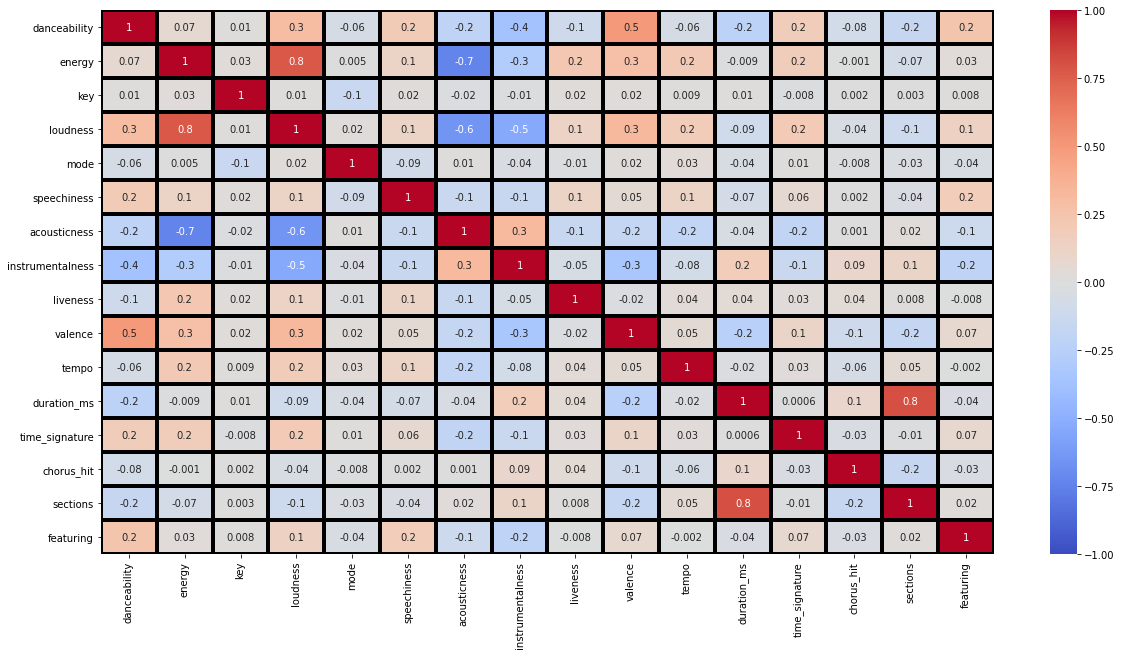

POSITIVE CORRELATION MEAN:  0.1179760439309974  (52.5 %)
NEGATIVE CORRELATION MEAN: -0.12625219521592493 (47.5 %)


In [ ]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')
plt.show()
positive_count = 0
negative_count = 0
positive_sum = 0
negative_sum = 0
for i in range(1, len(correlation_matrix)):
  for j in range(i):
    if correlation_matrix.iloc[i, j] > 0:
      positive_count += 1
      positive_sum += correlation_matrix.iloc[i, j]
    else:
      negative_count += 1
      negative_sum += correlation_matrix.iloc[i, j]

print("POSITIVE CORRELATION MEAN:  {}  ({} %)".format(positive_sum / positive_count, (positive_count / (positive_count + negative_count)) * 100))
print("NEGATIVE CORRELATION MEAN: {} ({} %)".format(negative_sum / negative_count, (negative_count / (positive_count + negative_count)) * 100))

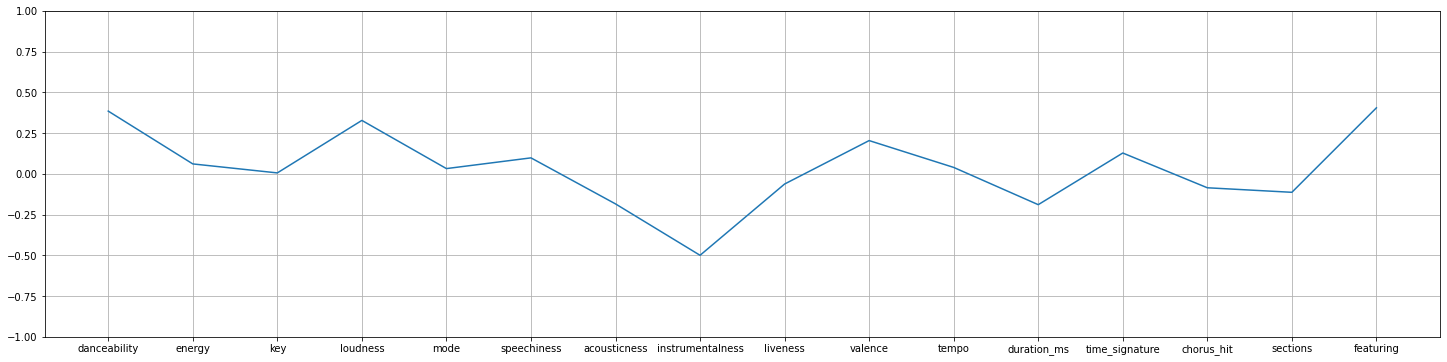

POSITIVE CORRELATION MEAN:  0.16831462505991987  (62.5 %)
NEGATIVE CORRELATION MEAN: -0.18914825072033462 (37.5 %)


In [ ]:
correlation_target = whole_dataset.corr().loc[primary_features , 'target']
plt.figure(figsize=(25, 6))
plt.plot(correlation_target)
plt.ylim(-1, 1)
plt.grid(True)
plt.show()

positive_count = 0
negative_count = 0
positive_sum = 0
negative_sum = 0
for num in correlation_target:
  if num > 0:
    positive_count += 1
    positive_sum += num
  else:
    negative_count += 1
    negative_sum += num

print("POSITIVE CORRELATION MEAN:  {}  ({} %)".format(positive_sum / positive_count, (positive_count / len(primary_features)) * 100))
print("NEGATIVE CORRELATION MEAN: {} ({} %)".format(negative_sum / negative_count, (negative_count / len(primary_features)) * 100))

###*FEATURES BOXPLOTS:*

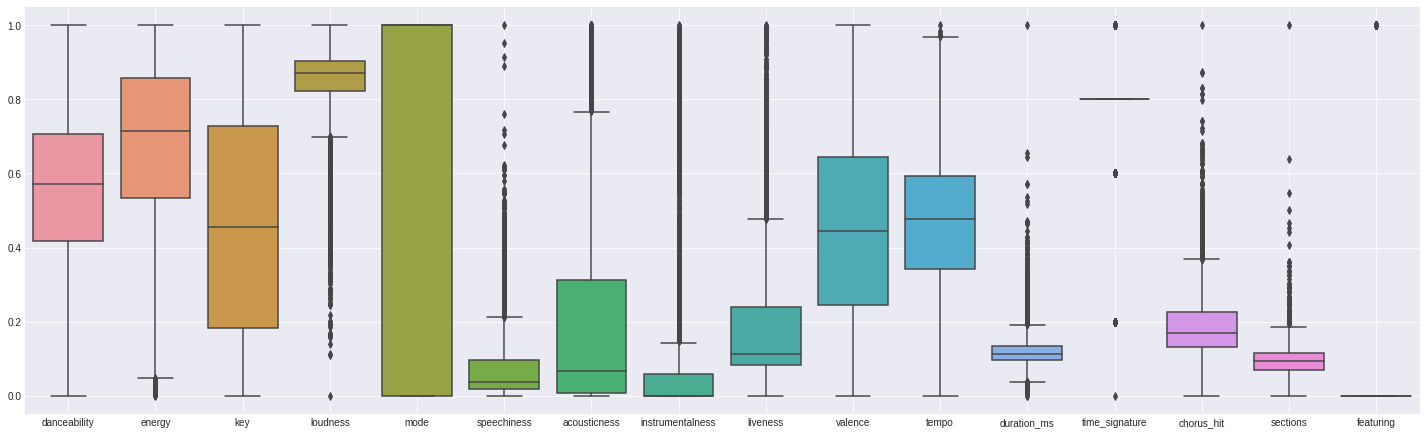

In [ ]:
fig = plt.figure(figsize=(25, 7.5))
ax = sns.boxplot(data=dataset)
plt.grid(True)
plt.show()

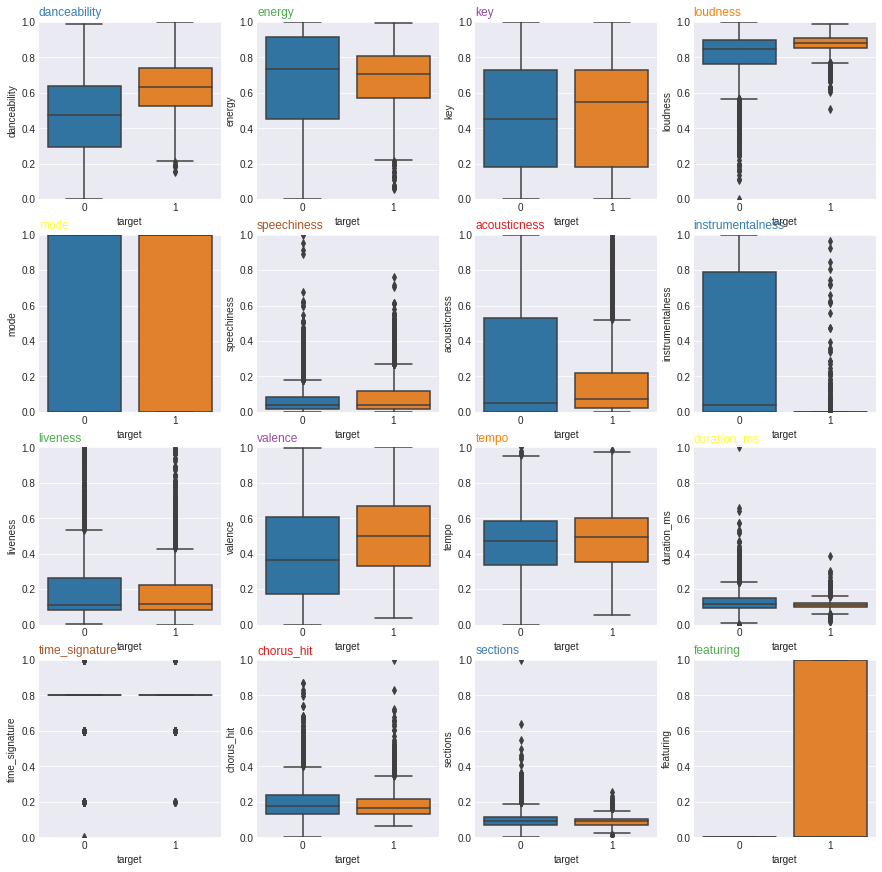

In [ ]:
# Initialize the figure
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15, 15))
plt.tick_params(labelbottom='off')
plt.tick_params(labelleft='off')

# create a color palette
palette = plt.get_cmap('Set1')

# multiple line plot
num=0
for column in primary_features:
  num+=1

  # Find the right spot on the plot
  plt.subplot(4,4, num)

  sns.boxplot(data=whole_dataset, y=column, x='target')
  #plt.plot(range(len(df)), df[column], marker='', color=palette(num % 7), linewidth=2.4, alpha=0.9, label=column)

  # Same limits for everybody!
  plt.ylim(0,1)
  

  # Add title
  plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num % 7) )   

###*IRQ OUTLIERS:*

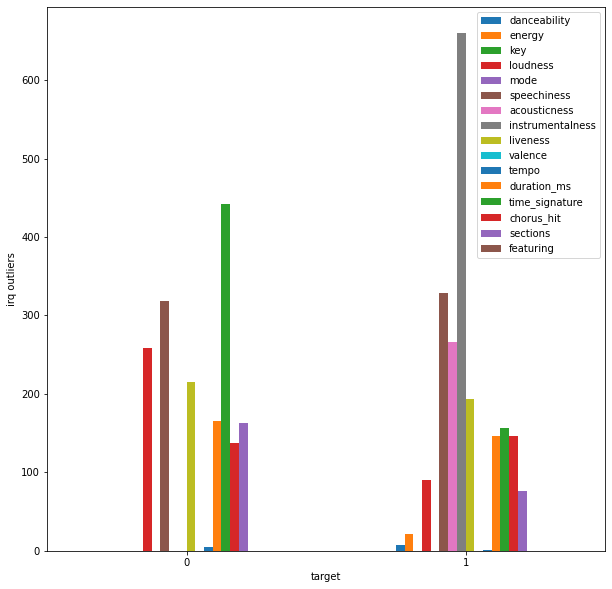

In [3]:
clean_dataset = dataset_0.copy()
outliers_dataset_0 = []
for feature in primary_features:
  clean_dataset=clean_dataset.sort_values(by=feature)
  q1, q3= np.percentile(clean_dataset[feature],[25,75])
  iqr=q3-q1
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr) 
  if lower_bound is not 0 or upper_bound is not 1:
    count_outliers=len(clean_dataset.loc[(clean_dataset[feature] < lower_bound)])
    count_outliers+=len(clean_dataset.loc[(clean_dataset[feature] > upper_bound)])
    outliers_dataset_0.append(count_outliers)
  else:
    outliers_dataset_0.append(0)

clean_dataset = dataset_1.copy()
outliers_dataset_1 = []
for feature in primary_features:
  clean_dataset=clean_dataset.sort_values(by=feature)
  q1, q3= np.percentile(clean_dataset[feature],[25,75])
  iqr=q3-q1
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr) 
  if lower_bound is not 0 or upper_bound is not 1:
    count_outliers=len(clean_dataset.loc[(clean_dataset[feature] < lower_bound)])
    count_outliers+=len(clean_dataset.loc[(clean_dataset[feature] > upper_bound)])
    outliers_dataset_1.append(count_outliers)
  else:
    outliers_dataset_1.append(0)

outliers = pd.DataFrame([outliers_dataset_0, outliers_dataset_1], columns=primary_features)
outliers.plot.bar(xlabel='target', ylabel='irq outliers', figsize=(10, 10), rot=0)
plt.show()

In [4]:
def score(data):
  scores = np.zeros(len(data))
  for feature in primary_features:
    q1, q3= np.percentile(data[feature],[25,75])
    iqr=q3-q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    median = np.median(data[feature])
    score = 0
    for idx, value in enumerate(data[feature]):
      score = np.abs(value - median)
      if value > upper_bound or value < lower_bound:
        score += 2
      else: 
        if value > q3 or value < q1:
          score += 1
      scores[idx] += score
  return scores

def median_distance(vector):
  result = []
  for value in vector:
    result.append(np.abs(np.median(dataset_0[feature]) - value))
  return result

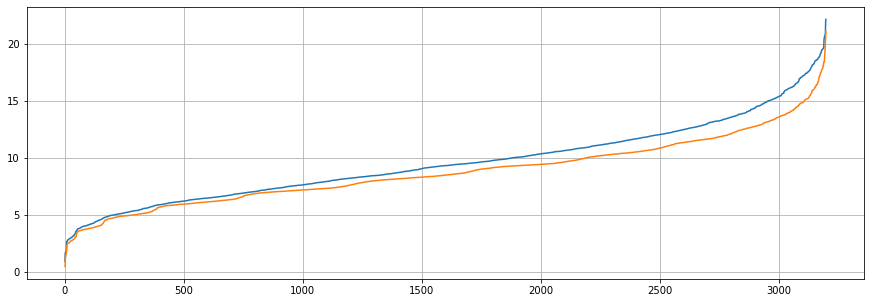

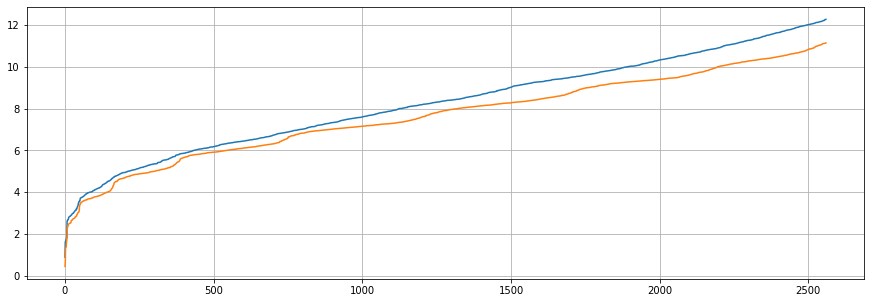

In [7]:
dataset_0['score_0'] = score(dataset_0)
dataset_1['score_1'] = score(dataset_1)
dataset_0 = dataset_0.sort_values(by='score_0')
dataset_1 = dataset_1.sort_values(by='score_1')

fig = plt.figure(figsize=(15, 5))
plt.plot(dataset_0['score_0'].to_numpy())
plt.plot(dataset_1['score_1'].to_numpy())
plt.grid(True)
plt.show()

dropped_dataset_0 = dataset_0.drop(dataset_0.tail(int(len(dataset_0) * 0.2)).index)
dropped_dataset_1 = dataset_1.drop(dataset_1.tail(int(len(dataset_1) * 0.2)).index)
fig = plt.figure(figsize=(15, 5))
plt.plot(dropped_dataset_0['score_0'].to_numpy())
plt.plot(dropped_dataset_1['score_1'].to_numpy())
plt.grid(True)
plt.show()

indexes_to_drop = dataset_0.tail(int(len(dataset_0) * 0.2)).index
indexes_to_drop = indexes_to_drop.append(dataset_1.tail(int(len(dataset_1) * 0.2)).index)
dropped_dataset = dataset.drop(indexes_to_drop)
dropped_labels = dataset_labels.drop(indexes_to_drop)

x_train_dropped, x_test_dropped, y_train_dropped, y_test_dropped = train_test_split(dropped_dataset, dropped_labels, test_size=0.2, stratify=dropped_labels, random_state=15)

###*LOGISTIC REGRESSION:*

In [ ]:
model = LogisticRegression(max_iter=200)jhang
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none', 'l1', 'l2', 'elasticnet']
c_values = [0.001, 0.01, 1, 10, 100]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, 
                           param_grid=grid, 
                           n_jobs=-1, 
                           cv=5, 
                           scoring='accuracy',
                           error_score=0)
grid_result = grid_search.fit(x_train, y_train)

print("Best validation: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Test score: %f" % metrics.accuracy_score(grid_result.best_estimator_.predict(x_test), y_test))

Best validation: 0.820049 using {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
Test score: 0.809375


In [ ]:
model = LogisticRegression(max_iter=200)
solvers = ['lbfgs']
penalty = ['l2']
c_values = range(1, 100, 1)

grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, 
                           param_grid=grid, 
                           n_jobs=-1, 
                           cv=5, 
                           scoring='accuracy',
                           error_score=0)
grid_result = grid_search.fit(x_train, y_train)

print("Best validation: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Test score: %f" % metrics.accuracy_score(grid_result.best_estimator_.predict(x_test), y_test))

Best validation: 0.821416 using {'C': 13, 'penalty': 'l2', 'solver': 'lbfgs'}
Test score: 0.808594


In [ ]:
model = LogisticRegression(max_iter=200)
solvers = ['lbfgs']
penalty = ['l2']
c_values = np.arange(9, 11, 0.075)

grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, 
                           param_grid=grid, 
                           n_jobs=-1, 
                           cv=5, 
                           scoring='accuracy',
                           error_score=0)
grid_result = grid_search.fit(x_train, y_train)

print("Best validation: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Test score: %f" % metrics.accuracy_score(grid_result.best_estimator_.predict(x_test), y_test))

Best validation: 0.820440 using {'C': 10.799999999999983, 'penalty': 'l2', 'solver': 'lbfgs'}
Test score: 0.810156


In [ ]:
model = LogisticRegression(max_iter=200)
solvers = ['lbfgs']
penalty = ['l2']
c_values = np.arange(9.5, 11, 0.025)

grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, 
                           param_grid=grid, 
                           n_jobs=-1, 
                           cv=5, 
                           scoring='accuracy',
                           error_score=0)
grid_result = grid_search.fit(x_train, y_train)

print("Best validation: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Test score: %f" % metrics.accuracy_score(grid_result.best_estimator_.predict(x_test), y_test))

Best validation: 0.820440 using {'C': 10.675000000000017, 'penalty': 'l2', 'solver': 'lbfgs'}
Test score: 0.809375


In [ ]:
model = LogisticRegression(max_iter=200)
solvers = ['lbfgs']
penalty = ['l2']
c_values = np.arange(9, 11, 0.025)

grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, 
                           param_grid=grid, 
                           n_jobs=-1, 
                           cv=5, 
                           scoring='accuracy',
                           error_score=0)
grid_result = grid_search.fit(x_train_dropped, y_train_dropped)

print("Best validation: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Test score: %f" % metrics.accuracy_score(grid_result.best_estimator_.predict(x_test_dropped), y_test_dropped))

NameError: ignored

###*KNN:*

In [ ]:
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
grid_search = GridSearchCV(estimator=model, 
                           param_grid=grid, 
                           n_jobs=-1, 
                           cv=5, 
                           scoring='accuracy',
                           error_score=0)
grid_result = grid_search.fit(x_train, y_train)

print("Best validation: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Test score: %f" % metrics.accuracy_score(grid_result.best_estimator_.predict(x_test), y_test))

Best validation: 0.805004 using {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}
Test score: 0.792188


In [ ]:
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
grid_search = GridSearchCV(estimator=model, 
                           param_grid=grid, 
                           n_jobs=-1, 
                           cv=5, 
                           scoring='accuracy',
                           error_score=0)
grid_result = grid_search.fit(x_train_dropped, y_train_dropped)

print("Best validation: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Test score: %f" % metrics.accuracy_score(grid_result.best_estimator_.predict(x_test_dropped), y_test_dropped))

Best validation: 0.799802 using {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Test score: 0.796875


###*GAUSSIAN NAIVE BAYES:*

In [ ]:
model = GaussianNB()
var_smoothing = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]

grid = dict(var_smoothing=var_smoothing)
grid_search = GridSearchCV(estimator=model, 
                           param_grid=grid, 
                           n_jobs=-1, 
                           cv=5, 
                           scoring='accuracy',
                           error_score=0)
grid_result = grid_search.fit(x_train, y_train)

print("Best validation: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Test score: %f" % metrics.accuracy_score(grid_result.best_estimator_.predict(x_test), y_test))

Best validation: 0.795823 using {'var_smoothing': 0.0001}
Test score: 0.789844


###*RANDOM FOREST:*

In [ ]:
model = RandomForestClassifier()

n_estimators = range(500, 1500, 100)
max_features = ['sqrt', 'log2']

grid = dict(n_estimators=n_estimators,max_features=max_features)
grid_search = GridSearchCV(estimator=model, 
                           param_grid=grid, 
                           n_jobs=-1, 
                           cv=5, 
                           scoring='accuracy',
                           error_score=0)
grid_result = grid_search.fit(x_train, y_train)

print("Best validation: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Test score: %f" % metrics.accuracy_score(grid_result.best_estimator_.predict(x_test), y_test))

Best validation: 0.859322 using {'max_features': 'log2', 'n_estimators': 700}
Test score: 0.852344


###*SUPPORT VECTOR MACHINE:*

In [ ]:
model = SVC()

kernel = ['poly', 'rbf', 'sigmoid']
C = range(1, 50, 1)
gamma = ['scale']

grid = dict(kernel=kernel,C=C,gamma=gamma)
grid_search = GridSearchCV(estimator=model, 
                           param_grid=grid, 
                           n_jobs=-1, cv=5, 
                           scoring='accuracy',
                           error_score=0)
grid_result = grid_search.fit(x_train, y_train)

print("Best validation: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Test score: %f" % metrics.accuracy_score(grid_result.best_estimator_.predict(x_test), y_test))

Best validation: 0.842132 using {'C': 12, 'gamma': 'scale', 'kernel': 'poly'}
Test score: 0.828125


###*PRINCIPAL COMPONENT ANALISYS:*

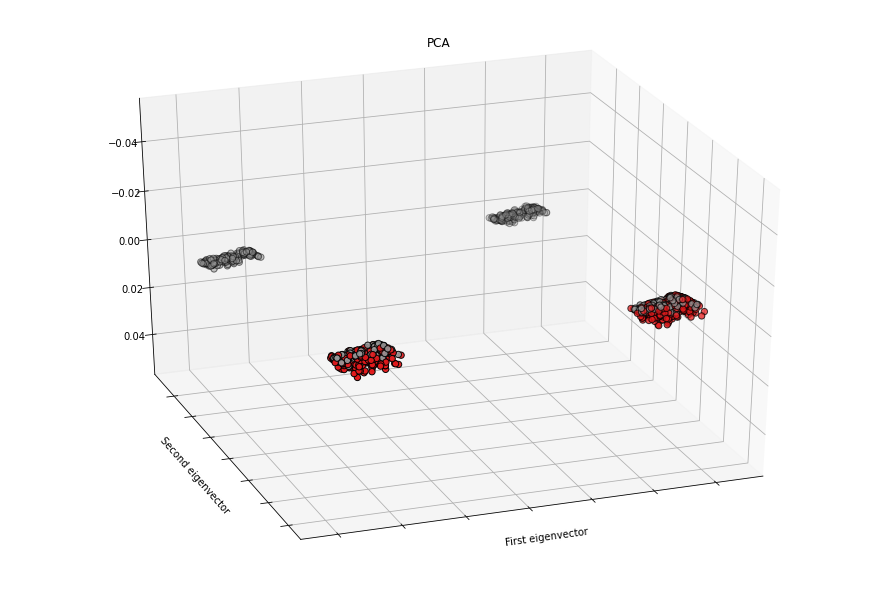

In [ ]:
fig = plt.figure(1, figsize=(12, 8))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=2).fit_transform(dropped)
ax.scatter(X_reduced[:, 0], 
          X_reduced[:, 1], 
          c=droppedy,
          cmap=plt.cm.Set1, 
          edgecolor='k', 
          s=40)
ax.set_title("PCA")
ax.set_xlabel("First eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Second eigenvector")
ax.w_yaxis.set_ticklabels([])

plt.show()

5118


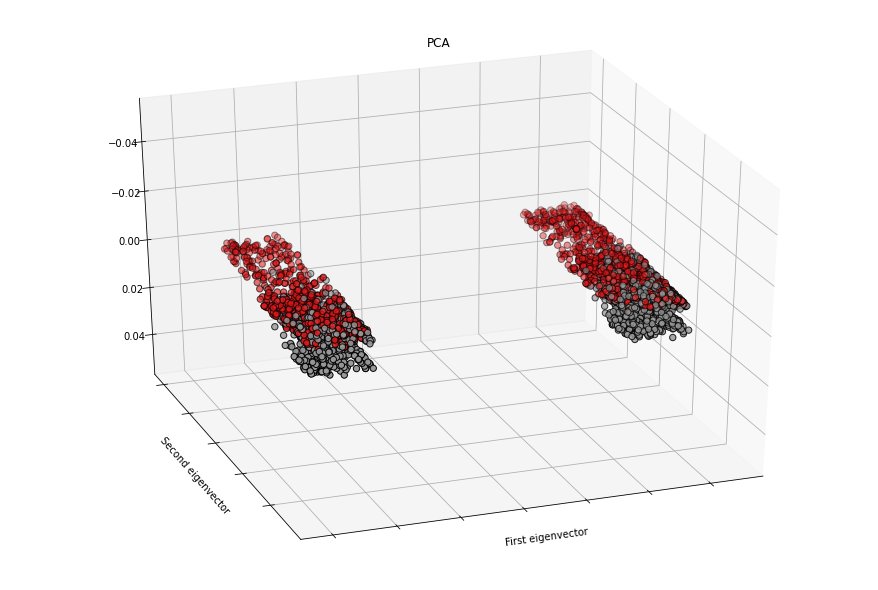

Best validation: 0.819463 using {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Test score: 0.789922


In [ ]:
pca = PCA(n_components=2)
pca_dataset = pca.fit_transform(dropped)
inverse_pca_dataset = pca.inverse_transform(pca_dataset)

MSE_score = ((dropped - inverse_pca_dataset)**2).sum(axis=1)

dorp_num = 0

MSE_max_scores = MSE_score.nlargest(dorp_num).index

dropped_dataset = x_train.drop(MSE_max_scores, axis=0)
dropped_dataset_labels = y_train.drop(MSE_max_scores, axis=0)

print(len(dropped_dataset))

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=2).fit_transform(dropped_dataset)
ax.scatter(X_reduced[:, 0], 
          X_reduced[:, 1], 
          c=dropped_dataset_labels,
          cmap=plt.cm.Set1, 
          edgecolor='k', 
           s=40)
ax.set_title("PCA")
ax.set_xlabel("First eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Second eigenvector")
ax.w_yaxis.set_ticklabels([])

plt.show()

model = LogisticRegression(max_iter=200)
solvers = ['lbfgs']
penalty = ['l2']
c_values = [10]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, 
                           param_grid=grid, 
                           n_jobs=-1, 
                           cv=5, 
                           scoring='accuracy',
                           error_score=0)
grid_result = grid_search.fit(dropped_dataset, dropped_dataset_labels)

print("Best validation: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Test score: %f" % metrics.accuracy_score(grid_result.best_estimator_.predict(dropped), droppedy))

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [ ]:
for attribute in primary_attributes:
#  dataset.boxplot(column=attribute, by='target')
  plt.show()

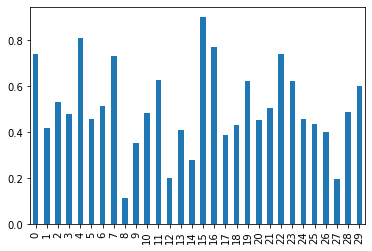

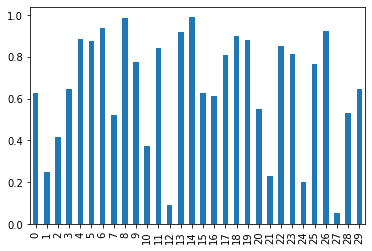

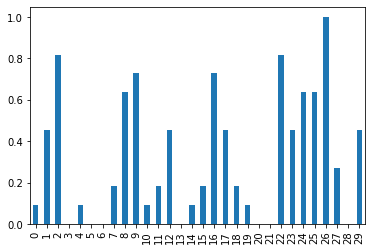

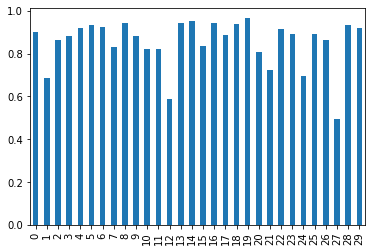

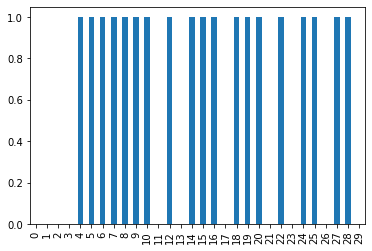

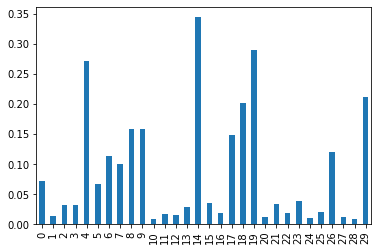

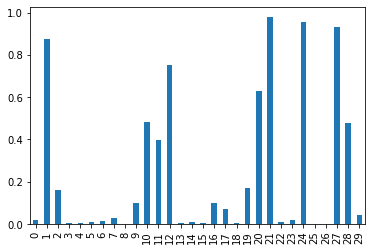

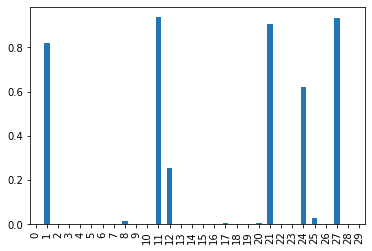

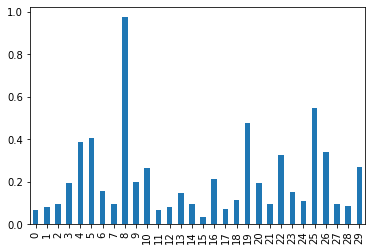

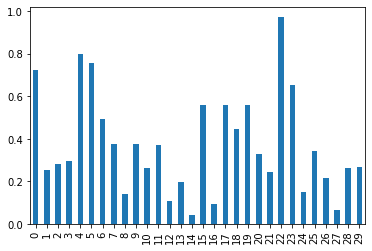

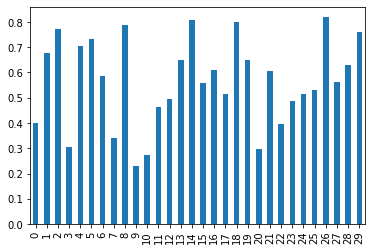

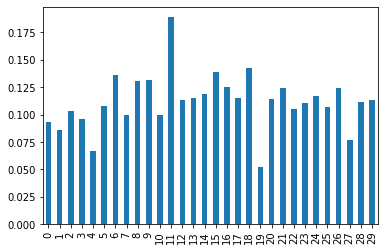

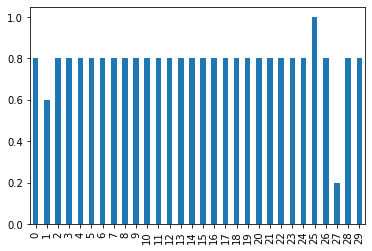

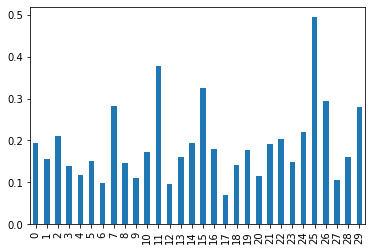

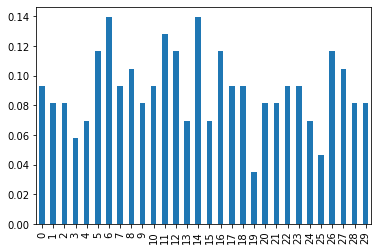

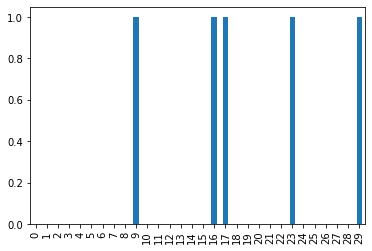

In [ ]:
for attribute in primary_attributes:
  #print("{}: 30 samples example\nglobl mean: {}, global variance:{}".format(attribute, dataset.loc[:,attribute].mean(), dataset.loc[:,attribute].var()))
  dataset[attribute].head(30).plot(kind='bar')
  plt.show()

In [ ]:
#TODO: da printare su uno stesso grafico in colori diversi su base target
'''
for attribute in dataset.columns.values:
  print(attribute + ":")
  dataset.plot(kind='scatter',x='id',y=attribute, color='green')
  dataset0.plot(kind='scatter',x='id',y=attribute, color='blue')
  dataset1.plot(kind='scatter',x='id',y=attribute, color='red')
  plt.show()
'''
#for attribute in dataset.columns.values:
 # dataset.plot(kind='scatter', x='target',y=attribute)

'\nfor attribute in dataset.columns.values:\n  print(attribute + ":")\n  dataset.plot(kind=\'scatter\',x=\'id\',y=attribute, color=\'green\')\n  dataset0.plot(kind=\'scatter\',x=\'id\',y=attribute, color=\'blue\')\n  dataset1.plot(kind=\'scatter\',x=\'id\',y=attribute, color=\'red\')\n  plt.show()\n'

CLASSIFICAZIONE

- Logistic regression

- KNN

- Gaussian Naive Bayes

- Random Forest

- Support Vector Machine  (sia soft sia rbf)

- PCA

grid search cross-validation per hyperparametri perogni

20% test 
80% train cross valid

precision 
roc 
auc 

#ANALISI

- curva di apprendimento

- matrice di confusione

- accuracy
 
- recall